In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Integration

This lecture is about integration and its relation with differentiation. We will discuss the definition of integral, the concept of differetial and we will learn how to solve integrals using the foundamental theorem of caclulus.

## Computing the area under a curve
Historically, the development of the concept of integral is motivated by a inportant geometrical problem: finding the area of the geometrical shape delimited from above by a function $f(x)$, from below by the $x$-axis and from left and right by two vertical straight lines located respectively at $x=a$ and $x=b$.

For example, consider the function $f(x) = \mathrm{e}^x$ between $a = 0$ and $b = 1$. We can visualize the shape delimited by this function as the light blue shaded region in the following pythion plot:

In [7]:
def plot_area(x_range, f, label = ""):
    plt.plot(x_range, f(x_range), label = label)
    plt.fill_between(x_range, 0, f(x_range), alpha = 0.25)
    plt.title("Area below a curve")

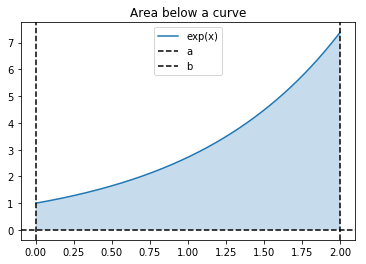

In [10]:
a = 0
b = 2
x_range = np.linspace(a,b,1000)
f = lambda x: np.exp(x)
plot_area(x_range, f, "exp(x)")
plt.axvline(a, label="a", ls="--", color="k")
plt.axvline(b, label="b", ls="--", color="k")
plt.axhline(0, ls="--", color="k")
plt.legend(loc="best")

We define the value of the integral of $f(x)$ from $a$ to $b$ as the area of this shaded region:

$$
\displaystyle\int_a^b f(x) dx = \text{Area under the curve delimited by f(x)}
$$

How can we define this concept in formulas? 

In elementary geometry, we can often find the area of complex shapes by subdividing it into many non-overlapping simpler shapes whose area is easy to compute. It is not usually possible to subdivide the shape under a function into simpler shapes such as rectangles. However, we can use rectangles to approximate the shape with a similar one. Specifically, we can divide the interval between $a$ and $b$ into $N$ non-overlapping $\Delta x$ long segments and approximate the area under the function as a sum of the areas of rectagles with base equal to $\Delta x$ and height equal to $f(x_n)$, where $x_n$ is the leftmost $x$-coordinate of the $n$-th segment.

These approximations are visualized in the following fugures:

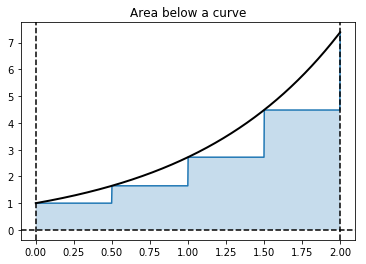

In [28]:
fN = lambda x,N = 2: f(np.floor(x*N)/N)
plot_area(x_range, fN, label=str(4))
plt.plot(x_range, f(x_range), c="k", lw=2, label = "Real function")
#plt.legend(loc="best")
plt.axvline(a, label="a", ls="--", color="k")
plt.axvline(b, label="b", ls="--", color="k")
plt.axhline(0, ls="--", color="k")

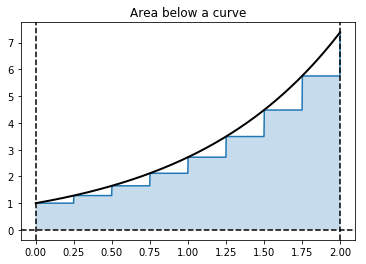

In [29]:
fN = lambda x,N = 4: f(np.floor(x*N)/N)
plot_area(x_range, fN, label=str(8))
plt.plot(x_range, f(x_range), c="k", lw=2, label = "Real function")
#plt.legend(loc="best")
plt.axvline(a, label="a", ls="--", color="k")
plt.axvline(b, label="b", ls="--", color="k")
plt.axhline(0, ls="--", color="k")

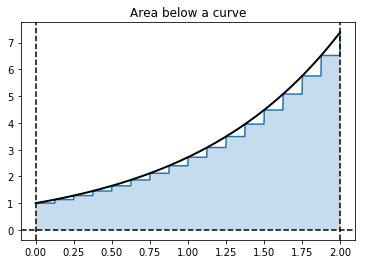

In [30]:
fN = lambda x,N = 8: f(np.floor(x*N)/N)
plot_area(x_range, fN, label=str(16))
plt.plot(x_range, f(x_range), c="k", lw=2, label = "Real function")
#plt.legend(loc="best")
plt.axvline(a, label="a", ls="--", color="k")
plt.axvline(b, label="b", ls="--", color="k")
plt.axhline(0, ls="--", color="k")

In formula, we can write this approximation as follows:
$$
\displaystyle\sum_{n=0}^{N-1} \text{Area under the $n$-th rectangle} = \displaystyle\sum^{N-1}_{n=0} f(x_n) \Delta x
$$
where $\Delta x = \dfrac{b - a}{N}$ is the length of the base of the rectangle and $x_n = n \Delta x$ is the leftmost $x$-coordinate of the $n$-th interval.

As you can see, the approximations made of rectangles becomes better and better as the number $N$ of rectangles becomes larger. This suggests that a proper definition for the is the limit of these approximations for $N$ tending to infinity:

$$
\displaystyle\int_a^b f(x) dx = \displaystyle\lim_{N \rightarrow \infty} \displaystyle\sum^{N-1}_{n=0} f(x_n) \Delta x_{n} = \displaystyle\lim_{N \rightarrow \infty} \displaystyle\sum^{N-1}_{n=0} f(x_n) \left(x_{n+1} - x_{n} \right)
$$

In the following figure, you can see that the values of these approximated area converges quickly to the value of the integral.

In [26]:
def integral(a, b, f, N):
    x_range = np.linspace(a,b,N)
    dx = (b-a)/N
    f_values = [f(x) for x in x_range]
    return sum([fx*dx for fx in f_values])

Text(0.5, 0, 'Number segments')

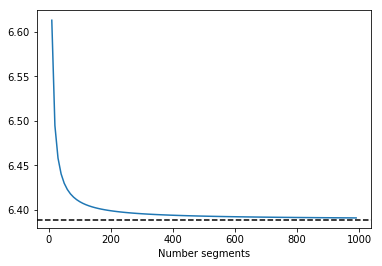

In [27]:
N_range = range(10,1000,10)
plt.plot(N_range, [integral(a,b,lambda x: np.exp(x), N) for N in N_range])
plt.axhline(np.exp(b) - np.exp(a), c = "k", ls="--")
plt.xlabel("Number segments")

## Some properties of integrals

Integrals follow several very important properties. let's start with the sum rule. Consider two functions $f(x)$ and $g(x)$, the integral of their sum is equal to the sum of their integrals:

$$
\displaystyle\int_a^b (f(x) + g(x))dx = \displaystyle\int_a^b f(x) dx + \displaystyle\int_a^b g(x) dx
$$

Furthermore,a constant $c$ can be "pulled out" from a integral:

$$
\displaystyle\int_a^b (c \cdot f(x))dx = c \displaystyle\int_a^b f(x) dx
$$

We also have a simple rule relating integrals for different boundary points. Consider three points $a < b < c$. the integral of a function $f(x)$ between $a$ and $c$ can be decomposed into two integrals:

$$
\displaystyle\int_a^c f(x) dx = \displaystyle\int_a^b f(x) dx + \displaystyle\int_b^c f(x) dx
$$

This property is visualized in the following plot:

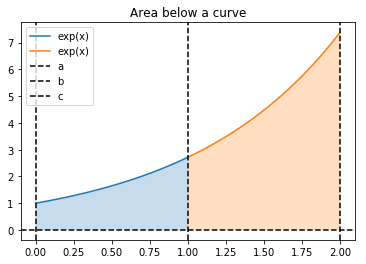

In [33]:
a = 0
b = 1
c = 2
x_range1 = np.linspace(a,b,1000)
x_range2 = np.linspace(b,c,1000)
f = lambda x: np.exp(x)
plot_area(x_range1, f, "exp(x)")
plot_area(x_range2, f, "exp(x)")
plt.axvline(a, label="a", ls="--", color="k")
plt.axvline(b, label="b", ls="--", color="k")
plt.axvline(c, label="c", ls="--", color="k")
plt.axhline(0, ls="--", color="k")
plt.legend(loc="best")

Aslo, by definition the integral between $b$ and $a$ where $b > a$ is equal to the negative of the integral between $a$ and $b$:

$$
\displaystyle\int_b^a f(x) dx = -\displaystyle\int_a^b f(x) dx
$$

Finally, consider a function $f_{-}(x)$ that only assumes negative values. The integral of $f_{-}(x)$ is the negative of the area under of the shape between $f(x)$ and the $x$-axis:

$$
\displaystyle\int_b^a f_{-}(x) dx = -1 \times \text{Area of the blue shaded area}
$$

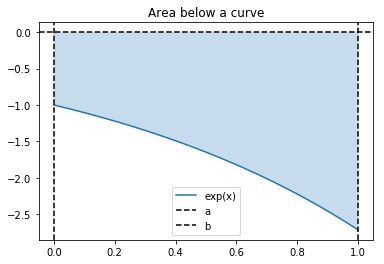

In [41]:
a = 0
b = 1
x_range1 = np.linspace(a,b,1000)
f = lambda x: -np.exp(x)
plot_area(x_range1, f, "exp(x)")
plt.axvline(a, label="a", ls="--", color="k")
plt.axvline(b, label="b", ls="--", color="k")
plt.axhline(0, ls="--", color="k")
plt.legend(loc="best")

Therefore, integrals can assume both positive and negative values. A integral can also be equal to zero if the negative part has the same area of the positive part. A example is 

$$
\displaystyle\int_{-\pi}^{\pi} \sin(x) dx = 0
$$

This is visualized in the following figure:

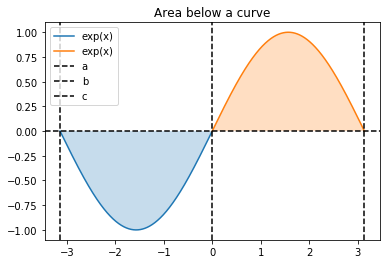

In [43]:
a = -np.pi
b = 0
c = np.pi
x_range1 = np.linspace(a,b,1000)
x_range2 = np.linspace(b,c,1000)
f = lambda x: np.sin(x)
plot_area(x_range1, f, "exp(x)")
plot_area(x_range2, f, "exp(x)")
plt.axvline(a, label="a", ls="--", color="k")
plt.axvline(b, label="b", ls="--", color="k")
plt.axvline(c, label="c", ls="--", color="k")
plt.axhline(0, ls="--", color="k")
plt.legend(loc="best")

## Solving integrals in the hard way

Now that we know how to define a integral, we can try to compute the area under some simple functions. It is quite a challening task to solve a integral just by using the definition. However, it is very ionstructive. later we will learn some poerful tools for solving integrals that will make our life much easier.

Consider the following integral:

$$
\displaystyle\int_0^b x^2 dx
$$


using the definition, we can write:
$$
\displaystyle\int_0^b x^2 dx = \displaystyle\lim_{N \rightarrow \infty} \displaystyle\sum^{N-1}_{n=0} x_n^2 \Delta x 
$$

where the length of the rectangles is:

$$ 
\Delta x = \dfrac{b - 0}{N} = \dfrac{b}{N}
$$

and the leftmost coordinate of the $n$-th segment is

$$ 
x_n = n \Delta x = \dfrac{n}{N} b 
$$

using these formulas, we can rewrite the sum as follows:

$$ 
\displaystyle\sum^{N-1}_{n=0} x_n^2 \Delta x = \displaystyle\sum^{N-1}_{n=0} \dfrac{n^2}{N^3} b^3 = \dfrac{b^3}{N^3} \displaystyle\sum^{N-1}_{n=0} n^2 
$$

we can now use a well-known formula for the sum of the first $N$ squared numbers:

$$ 
\displaystyle\sum^{N-1}_{n=0} n^2 = \dfrac{(N-1)N(2N -1)}{6} 
$$

Using this formula, our sum becomes:

$$ 
\displaystyle\sum^{N-1}_{n=0} x_n^2 \Delta x = b^3 \dfrac{(N-1)N(2N -1)}{6 N^3} = b^3 \dfrac{2N^3 -3 N^2 + 6}{6 N^3}
$$

and we can finally take the limit for $N$ going to infinity!

$$
\displaystyle\int_0^b x^2 dx = \displaystyle\lim_{N \rightarrow \infty} b^3 \dfrac{2N^3 -3 N^2 + 6}{6 N^3}= b^3 \displaystyle\lim_{N \rightarrow \infty} \dfrac{2N^3}{6 N^3} = \dfrac{1}{3} b^3 
$$

Done! We just found that:

$$
\displaystyle\int_0^b x^2 dx = \dfrac{1}{3} b^3 
$$

That was a lot of work!

### Exercises
#### 5.1

**a)** Show that:
$$\displaystyle\int_0^b x ~dx = \dfrac{1}{2} b^2 $$

using the following formula:

$$ \displaystyle\sum_{n=1}^{N-1} n = \dfrac{N (N-1)}{2} $$

**b)** Show the same result using elementary geometry.


**c)** Show that:
$$\displaystyle\int_0^b x^3 dx = \dfrac{1}{4} b^4 $$

using the following formula:

$$ \displaystyle\sum_{n=1}^{N-1} n^3 = \left(\displaystyle\sum_{n=1}^{N-1} n\right)^2 = \left(\dfrac{N (N-1)}{2} \right)^2 $$



## Differentials 

Given a function $g(x)$, we can obtain a finite difference $\Delta g(x) = g(x + h) - g(x)$. Analogously, the **differential** $d g(x)$ which roguhly speaking represents an infinitesimally small difference in the value of $g(x)$. 

More precisly, a differential is a object that is used for integrating a function by generating finite differences. For example, the object $dx$ in our previous definition of integral is a **differential** that generates differences of the form $(x + h) - x$.

More generally, the integral of a function $f(x)$ with respect of the $dg(x)$ is defined as follows:

$$\displaystyle\int_a^b f(x) dg(x) = \displaystyle\lim_{N \rightarrow \infty} \displaystyle\sum^{N-1}_{n=1} f(x_n) \Delta g(x_{n}) = \displaystyle\lim_{N \rightarrow \infty} \displaystyle\sum^{N-1}_{n=1} f(x_n) \left(g(x_{n+1}) - g(x_{n}) \right)$$

Note that our previous definition of integral is a special case of this new definition with the differential of the identity function $g(x) = x$.

In [94]:
def integral(a, b, f, g, N):
    x_range = np.linspace(a,b,N)
    dx = (b-a)/N
    f_values = [f(x) for x in x_range]
    dg_values = [g(x + dx) - g(x) for x in x_range]
    return sum([fx*dgx for fx, dgx in zip(f_values, dg_values)])

Text(0.5, 0, 'Number segments')

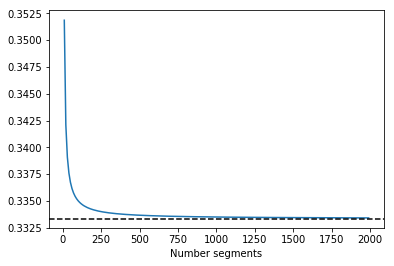

In [87]:
N_range = range(10,2000,10)
plt.plot(N_range, [integral(0,1,lambda x: x**2, lambda x: x, N) for N in N_range])
plt.axhline(1/3., c = "k", ls="--")
plt.xlabel("Number segments")

## Some simple rules for differentials
Dofferentials follow rules very simular to the rules for the derivative.

### Product with a constant
Let $c$ be a constant and $f(x)$ a function:
$$ d (c f(x)) = c df(x) $$

### Sum rule
$$ d (f(x) + g(x)) = df(x) + dg(x) $$

### Product rule

$$ d \left(f(x) g(x) \right) = g(x) df(x) + f(x) dg(x) $$

### Chain rule

$$ d \left( f\big(y(x)\big) \right) = \dfrac{df (y(x))}{dy} dy(x)$$

As special case, if $y(x) = x$, we get:

$$ d f(x)  = \dfrac{df}{dx} dx$$

As we will see later, this is a statement of the foundamental theorem of calculus.

## Some properties of integrals with respect to differentials

Integrals with respect to a differential have the same properties of regular integrals.

### Sum rule
$$
\displaystyle\int_a^b (g_1(x) df_1(x) + g_2(x) df_2(x)) = \displaystyle\int_a^b g_1(x) df_1(x) + \displaystyle\int_a^b g_2(x) df_2(x)
$$

### Multiplication by a constant
$$
\displaystyle\int_a^b (c \cdot g_1(x) df_1(x)) = c \displaystyle\int_a^b g_1(x) df_1(x)
$$

### Splitting domain of integration
$a < b < c$

$$
\displaystyle\int_a^c g(x) df(x) = \displaystyle\int_a^b g(x) df(x) + \displaystyle\int_b^c g(x) df(x)
$$

$$
\displaystyle\int_b^a g(x) df(x) = -\displaystyle\int_a^b g(x) df(x)
$$

### Exercises:
#### 5.2

Compute the following differentials using sum rule, product rule and chain rule:

**a)** $ d \left(x^3 \cos(2x) + x\right) $

**b)** $ d \left(\cos(e^x) \right) $

**c)** $ d \left(x^3 + 2x^2 + 3 \right) $

**d)** $ d \left(e^{\cos(x)}(2 x^4 + 4x^3 + 2x) \right) $

**e)** Show that:
$$
\displaystyle\int_0^b x dx^2 = 2 \displaystyle\int_0^b x^2 dx = \dfrac{2}{3} b^3 
$$
using the foundamental theorem of calculus.

## Solving integrals in the easy way: The foundamental theorem of calculus

The foundamental theory of calculus is a very powerful statement connecting the concept of derivative with the concept of integral. In practice, the foundamental theorem offers a simple way to solve the integral of a function $f(x)$ as far as we know a primitive function $F(x)$ such that:

$$
\dfrac{dF(x)}{dx} = f(x)
$$

Some people call the operation of finding the primitive $F(x)$ for a given $f(x)$ as anti-derivative as it is the inverse problem of finding the derivative of a function.

The foundamental theorem of caclculus can be stated as 

$$
f(x) dx = \dfrac{dF(x)}{dx} dx = d F(x) 
$$

let's see how to use this theorem for solving integrals. Consider the following integral:

$$
\displaystyle\int_a^b f(x) dx
$$

Assume that we know a function $F(x)$ such that $\frac{dF(x)}{dx} = f(x)$. Then we can use the foundamental theorem to transform our integral as follows:

$$
\displaystyle\int_a^b f(x) dx = \displaystyle\int_a^b \dfrac{dF(x)}{dx} dx = \displaystyle\int_a^b dF(x) 
$$

We now need a way to solve a integral of this form:

$$
\displaystyle\int_a^b dF(x) 
$$

To do so, we can try to directly use the definition:

$$
\displaystyle\int_a^b dF(x) = \displaystyle\lim_{N \rightarrow \infty} \displaystyle\sum_{n=0}^{N-1} \left(F(x_{n+1}) - F(x_n)\right)
$$

This is a telescopic sum, meaning that all but two terms in the sum exactly cancel out. In fact

\begin{aligned}
 \displaystyle\sum_{n=1}^{N-1} \left(F(x_{n+1}) - F(x_n)\right) &=   (\color{red}{F(x_1)} - \color{blue}{F(x_0)}) + (\color{orange}{F(x_2)} - \color{red}{F(x_1)} ) + ... + (\color{purple}{F(x_{N-1})} - \color{green}{F(x_{N-2})}) + (\color{brown}{F(x_{N})} - \color{purple}{F(x_{N-1})}) \\
 &= - \color{blue}{F(x_0)} + (\color{red}{F(x_1)} - \color{red}{F(x_1)}) + (\color{orange}{F(x_2)} - \color{orange}{F(x_2)}) + ... + (\color{purple}{F(x_{N-1})} - \color{purple}{F(x_{N-1})}) + \color{brown}{F(x_{N})} \\
 &= - \color{blue}{F(x_0)} + \color{brown}{F(x_{N})}\\
 &= \color{brown}{F(b)} - \color{blue}{F(a)}
\end{aligned}

This allows us to easily compute the limit and solve the integral:

$$
\displaystyle\int_a^b dF(x) = \displaystyle\lim_{N \rightarrow \infty} \displaystyle\sum_{n=0}^{N-1} \left(F(x_{n+1}) - F(x_n)\right) = \displaystyle\lim_{N \rightarrow \infty} (F(b) - F(a)) = F(b) - F(a)
$$

Summarising:

$$
\displaystyle\int_a^b f(x) dx = \displaystyle\int_a^b \dfrac{dF(x)}{dx} dx = \displaystyle\int_a^b dF(x) = F(b) - F(a)
$$

### How to solve an integral using the foundamental theorem

1) Find $F(x)$ such that:
$$ \dfrac{dF}{dx} = f(x) $$

2) Use the foundamental theorem:
$$ \displaystyle\int_a^b f(x) dx = F(b) - F(a) $$

#### Example 1
Consider the following integral:
$$
\displaystyle\int_0^{b} x^2 dx
$$
The function to be integrated is $f(x) = x^2$. It is easy to check that a primitive of this function is:
$$
F(x) = \dfrac{1}{3} x^3
$$
The foundamental theorem says that:
$$
f(x) dx = \dfrac{dF(x)}{dx} dx = d F(x)
$$
and in our case this means that:
$$
x^2 dx = d\Big(\dfrac{1}{3} x^3\Big)
$$
Therefore:
$$ 
\displaystyle\int_0^{b} x^2 dx = \displaystyle\int_0^{b} d (\dfrac{1}{3} x^3) = \dfrac{1}{3} b^3 - \dfrac{1}{3} 0^3 = \dfrac{b^3}{3}
$$

#### Example 2
$$ \dfrac{d \sin(x)}{dx} = \cos(x) $$
$$ \displaystyle\int_0^{\pi/2} \cos(x) dx = \displaystyle\int_0^{\pi/2} d\sin(x) = \sin(\pi/2) - \sin(0) = 1 - 0 = 1$$

#### Example 3
$$ \dfrac{d \mathrm{e}^{3x}}{dx} = 3 \mathrm{e}^x $$

Therefore $\dfrac{1}{3}\mathrm{e}^{3x}$ is a primitive of $\mathrm{e}^{3x}$. Hence:

$$ 
\int_0^{1} e^{3x} dx = \int_0^{1} d(\frac{1}{3}e^{3x}) = \frac{1}{3} e^3 - \frac{1}{3} e^0 = \frac{1}{3}(e^3 - 1)
$$


### Exercises
#### 5.3
Compute the following integrals using the foundamental theorem

**a)** $\displaystyle\int_0^1 (\mathrm{e}^x + x^3) dx$

**b)** $\displaystyle\int_{-1}^2 (4x^4 +3x + 1) dx$

**c)** $\displaystyle\int_{-1}^2 (2x^2 + x - 2 + \mathrm{e}^x) dx$

**d)** $\displaystyle\int_{0}^2 \mathrm{e}^{5x} dx$

**e)** $\displaystyle\int_{0}^1 \cos(3x) dx$

**f)** $\displaystyle\int_{-1}^1 (\mathrm{e}^{5x} + \mathrm{e}^{3x} + \mathrm{e}^x) dx$


#### 5.4
Compute the following integrals with respect of a differential using the foundamental theorem:

**a)**  $\displaystyle\int_0^\pi d\cos(x)$

**b)** $\displaystyle\int_0^1 d\mathrm{e}^x$

**c)** $\displaystyle\int_0^1 x^2 d(x^2)$

**d)** $\displaystyle\int_0^1 x d(x^3)$

Hint: $dF(x) = \dfrac{dF(x)}{dx} dx$

#### 5.5
Solve the following integral using a symmetruy argument without using the foundamental theorem. 

**a)** $\displaystyle\int_{-\pi/2}^{\pi/2} \sin(x) dx$

Find two primitives for each of the following functions:

**b)** $f(x) = \mathrm{e}^{2x}$

**c)** $f(x) = \cos(x)$

**d)** $f(x) = x^4 + 2$



## Some tricks for solving integrals

### Integration by parts
Integration by parts can be used when we want to compute the integral of a product of two functions. It is a simple consequence of the product rule of differentials.

$$
d \left(f(x) g(x) \right) = g(x) df(x) + f(x) dg(x) 
$$

$$
\displaystyle\int_a^b d \left(f(x) g(x) \right) = \displaystyle\int_a^b g(x) df(x) + \displaystyle\int_a^b f(x) dg(x) 
$$

$$
\displaystyle\int_a^b g(x) \dfrac{df(x)}{dx}dx = \left(f(b) g(b) - f(a) g(a)\right) - \displaystyle\int_a^b f(x) \dfrac{dg(x)}{dx}{dx}
$$

#### Example 1
$$
\displaystyle\int_0^1 x e^x dx
$$


$$
\displaystyle\int_a^b g(x) \dfrac{df(x)}{dx}dx 
$$

where 
$$
g(x) = x
$$
and
$$
f(x) = e^x
$$

Therefore, we can use the integration by parts formula:
$$
\displaystyle\int_0^1 x \dfrac{d \mathrm{e}^x}{dx}dx = \left(\mathrm{e}^1 \cdot 1 - \mathrm{e}^0 \cdot 0\right) - \displaystyle\int_0^1 \mathrm{e}^x \dfrac{dx}{dx}{dx} = \mathrm{e} - \displaystyle\int_0^1 \mathrm{e}^x {dx} = \mathrm{e} - (\mathrm{e}^1 - \mathrm{e}^0) = \mathrm{e} - \mathrm{e} + 1 = 1
$$





### Sostitution of variables